In [1]:
import os, sys

import tensorflow as tf

from chromo import model_zoo, utils, data_processor, chrombpnet_utils, model_builder
from chromo import run_chromo as rc

In [7]:
import importlib

importlib.reload(utils)

<module 'chromo.utils' from '/home/chandana/projects/chromo/chromo/utils.py'>

# Load data

In [2]:
config = {} # config dictionary required for compatibility w/my other models.

dp = data_processor.DataProcessor(dataset='chrombpnet', subsample=True) # subsample a subset of the data just for demonstration purposes

train_data = dp.load_data("train")
valid_data = dp.load_data("valid")

  0%|                                  | 0/6772 [00:00<?, ?it/s]

loading peaks...
got split:train for bed regions:(6772, 10)
loading nonpeaks...
got split:train for bed regions:(6753, 10)
Getting seqs!


  9%|█▉                    | 607/6772 [00:00<00:02, 3021.94it/s]

Getting counts!


  0%|                                  | 0/6753 [00:00<?, ?it/s]

Getting coords!
Getting seqs!


  9%|█▉                    | 591/6753 [00:00<00:01, 5906.61it/s]

Getting counts!


100%|███████████████████| 6753/6753 [00:00<00:00, 870387.04it/s]


Getting coords!


100%|███████████████████████| 640/640 [00:00<00:00, 5514.47it/s]

loading peaks...
got split:valid for bed regions:(640, 10)
loading nonpeaks...
got split:valid for bed regions:(659, 10)
Getting seqs!
Getting counts!



100%|███████████████████████| 64/64 [00:00<00:00, 425412.77it/s]


Getting coords!
Getting seqs!
Getting counts!
Getting coords!


# Load Model

In [3]:
mb = model_builder.ModelBuilder(
    config, 
    epochs=1, 
    batch_size=64, 
    log_wandb=False,
    tuning_mode=False
)

model = mb.build_model(model_fn="chrombpnet")

model = mb.compile_model(model, dataset="chrombpnet")

Building model...


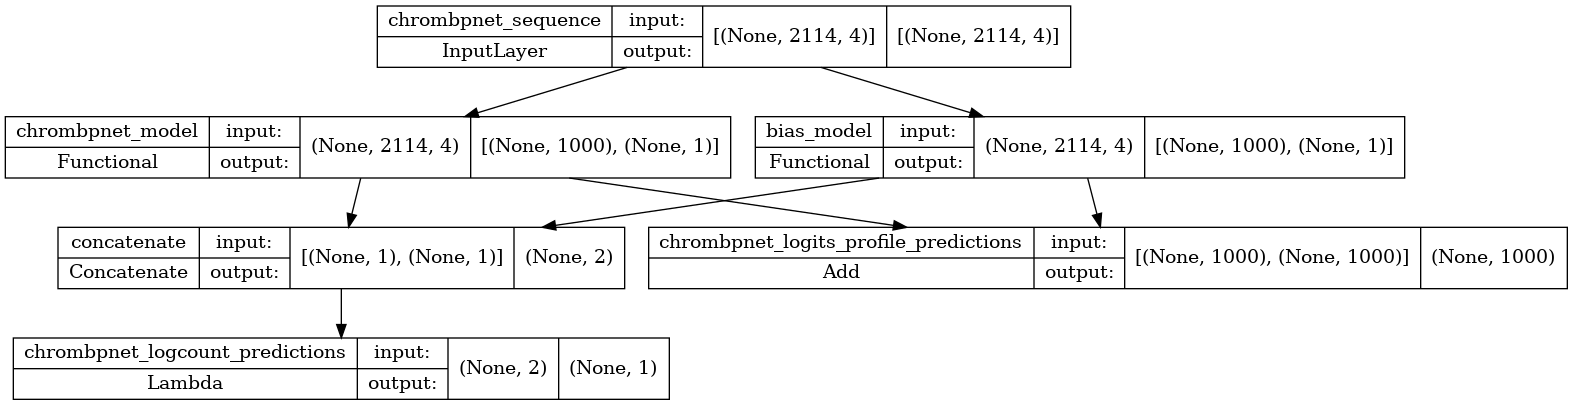

In [4]:
tf.keras.utils.plot_model(model, show_shapes=True)

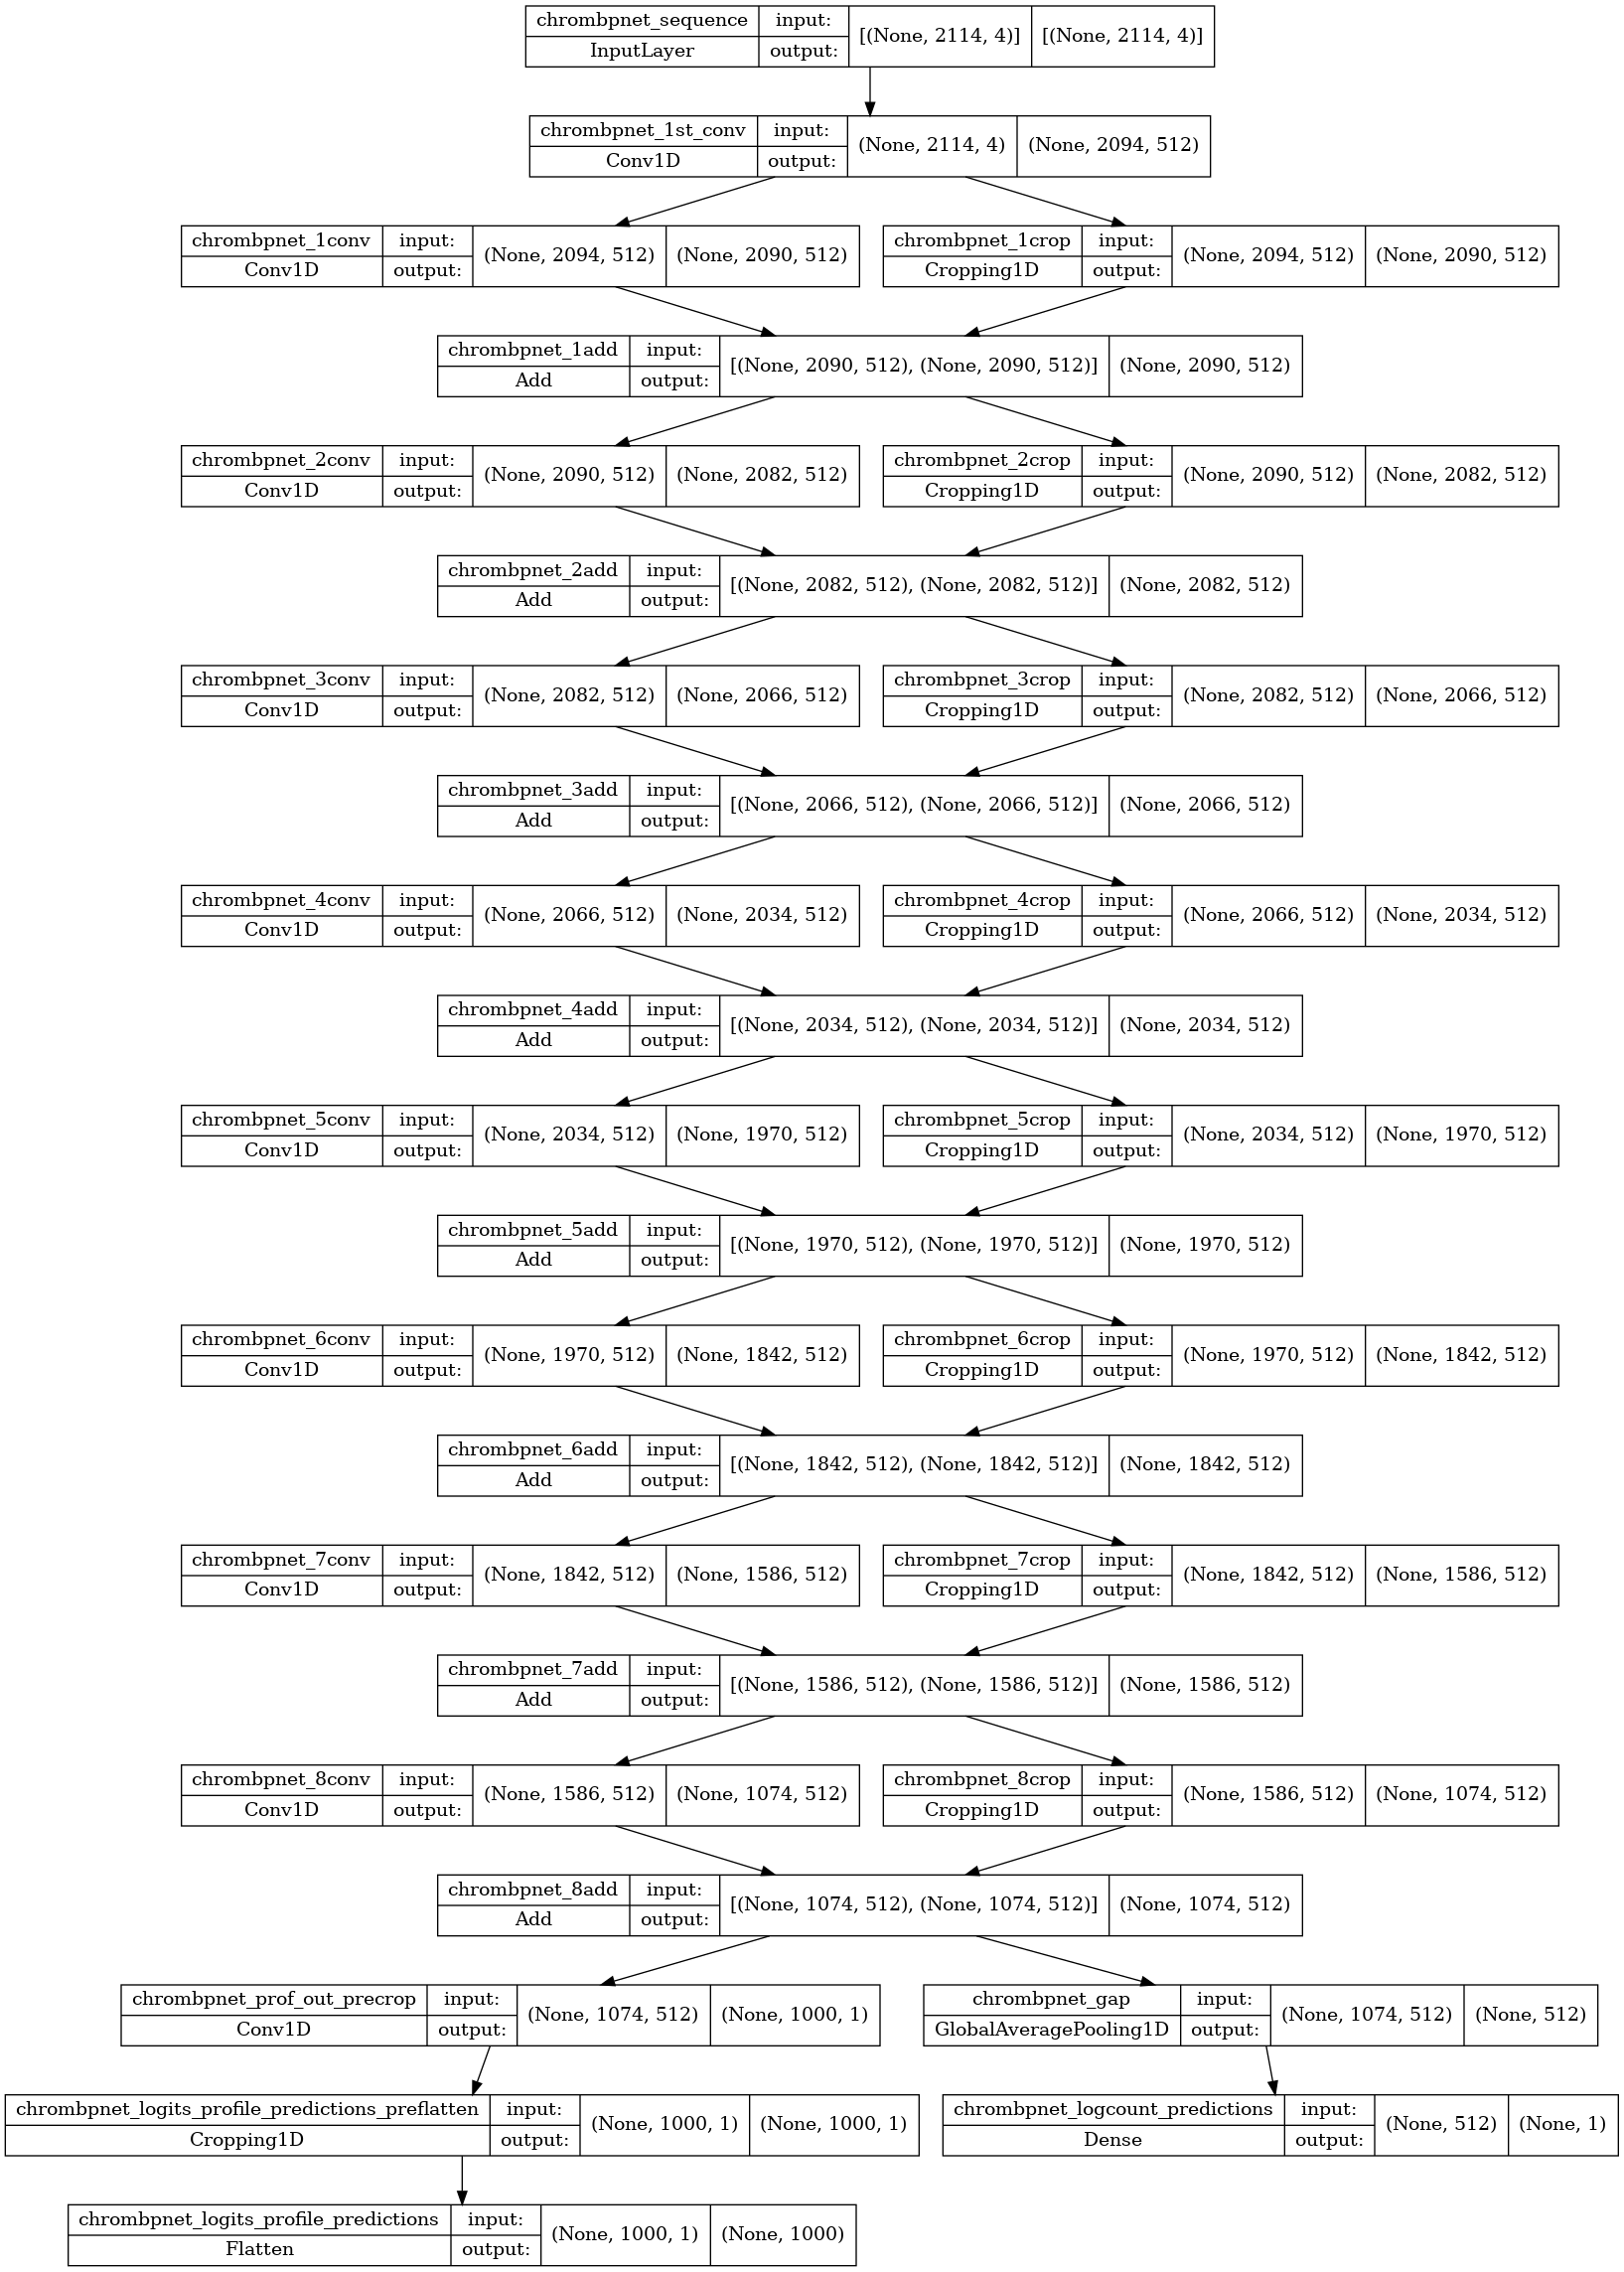

In [5]:
tf.keras.utils.plot_model(model.layers[1], show_shapes=True)

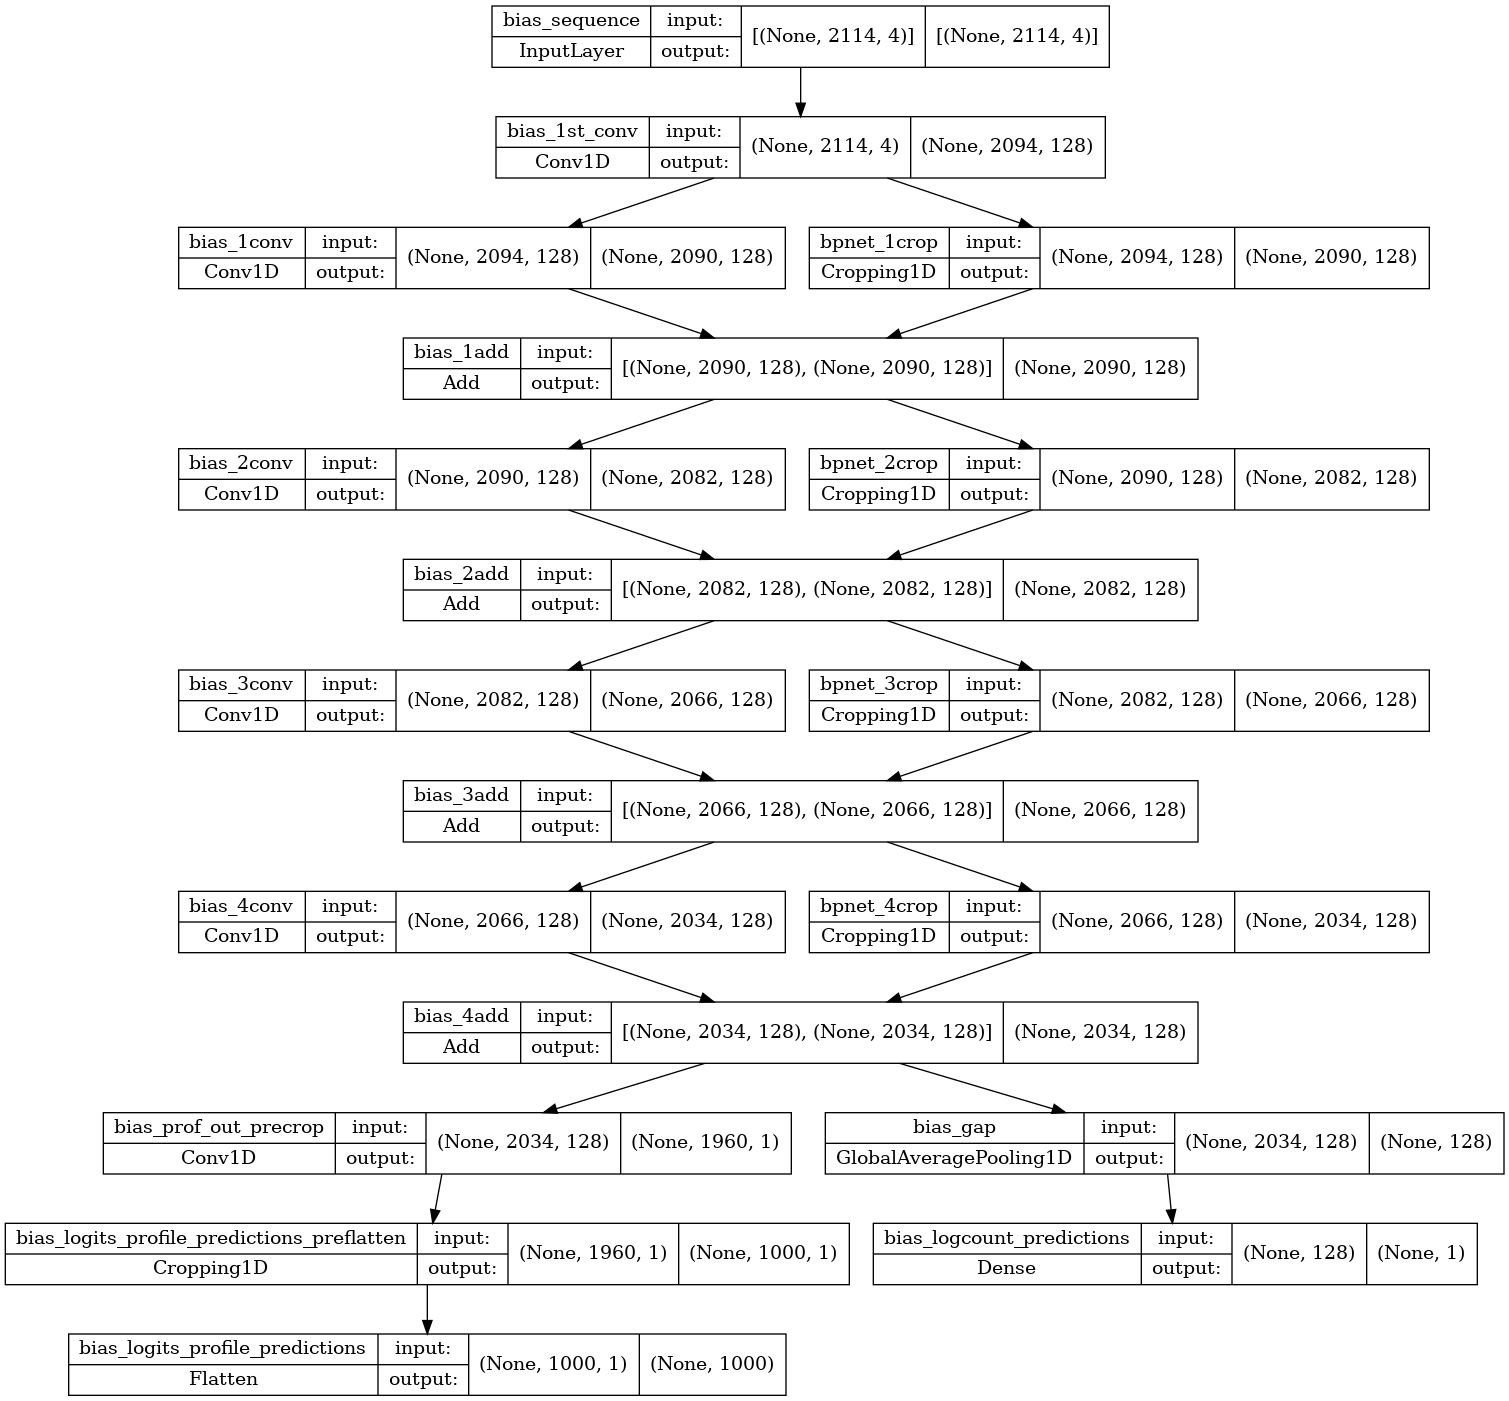

In [10]:
tf.keras.utils.plot_model(model.layers[2], show_shapes=True)

# Train

In [6]:
callbacks = [
    mb._get_early_stopping_callback(),
    mb._get_reduce_lr_callback(),
]
          
           
history = model.fit(
            train_data,
            validation_data=valid_data,
            epochs=1,
            verbose=1,
            callbacks=callbacks
            )            

117/117 [==============================] - 71s 534ms/step - loss: 1666.4346 - chrombpnet_logits_profile_predictions_loss: 1117.4087 - chrombpnet_logcount_predictions_loss: 7.2335 - val_loss: 1486.1659 - val_chrombpnet_logits_profile_predictions_loss: 1088.9204 - val_chrombpnet_logcount_predictions_loss: 5.2338 - lr: 0.0010


# Evaluate

In [36]:
dp = data_processor.DataProcessor(dataset='chrombpnet', subsample=True)

test_data = dp.load_data("test", return_coords=True) # coords necessary for evaluating chrombpnet

counts_df, profile_df = utils.evaluate_model_chrombpnet(
    model, 
    test_data, 
) # returns counts dataframe performance

100%|████████████████████| 2588/2588 [00:00<00:00, 22438.89it/s]

loading peaks...
got split:test for bed regions:(2588, 10)
loading nonpeaks...
got split:test for bed regions:(2588, 10)
Getting seqs!



 20%|████▎                 | 514/2588 [00:00<00:00, 5135.16it/s]

Getting counts!


  0%|                                  | 0/2588 [00:00<?, ?it/s]

Getting coords!
Getting seqs!
Getting counts!


  0%|                                    | 0/81 [00:00<?, ?it/s]

Getting coords!
0/81


  8%|█▊                    | 431/5176 [00:00<00:01, 4306.81it/s]

Finished saving predictions!


 49%|██████████▎          | 2545/5176 [00:00<00:00, 4246.34it/s]/home/chandana/miniforge3/envs/dummy/lib/python3.8/site-packages/scipy/spatial/distance.py:1290: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)
/home/chandana/projects/chromo/chromo/chrombpnet_utils.py:1448: RuntimeWarning: invalid value encountered in divide
  profile_prob = profile / np.sum(profile)
/home/chandana/miniforge3/envs/dummy/lib/python3.8/site-packages/scipy/spatial/distance.py:1291: RuntimeWarning: invalid value encountered in divide
  q = q / np.sum(q, axis=axis, keepdims=True)
100%|█████████████████████| 5176/5176 [00:01<00:00, 4380.51it/s]


In [37]:
df

,peaks
mse,6.675134
pearsonr,-0.182095
spearmanr,-0.117850
